Here I want to simulate two different Poisson processes. Beginning and End of a civilization. And see what the random variable $\Delta T = T^{beg}_1 - T^{end}_1$ is like - what is it's distribution like? Very possible that it remains an exponential. Here $T_1$ is the first arrival time.  

In [26]:
clear all

In [27]:
nTrials = 5000;
maxt = nTrials;
t = 0:1:maxt; % 1000 years
repeat = 10000;

hazardRate = 0.001; %1 death per 100 years 
birthRate = 0.05; % 1 civilization is born per 100 years

hazardP = hazardRate*maxt/nTrials;
birthP = birthRate*maxt/nTrials;

yBirth = coinflip(t,birthP,repeat);
yHazard = coinflip(t,hazardP,repeat);

In [28]:
for i = 1:1:repeat
    birthTemp = yBirth(:,i);
    temp = find(birthTemp);
    firstBirth(i) = t(temp(1));
    % Find first hazard after birth
    hazardTemp = yHazard(:,i);
    temp1 = find(hazardTemp);
    temp2 = temp1(temp1>temp(1));
    if ~isempty(temp2)
        firstHazard(i) = t(temp2(1));
    else
        firstHazard(i) = t(end)+1;
    end
        
end


In [29]:
T = firstHazard-firstBirth;

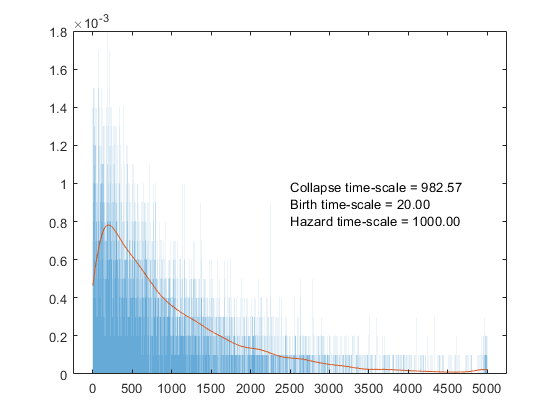

In [30]:
lifedist = fitdist(T','kernel');
histogram(T,'Normalization','pdf','BinEdges',t,'EdgeColor','none');
hold on;
plot(t,pdf(lifedist,t));
text(0.5,0.5,{['Collapse time-scale = ',num2str(lifedist.mean,'%10.2f')],...
['Birth time-scale = ',num2str(1/birthRate,'%10.2f')],...
['Hazard time-scale = ',num2str(1/hazardRate,'%10.2f')]},'Units','normalized');

In [31]:
median(T)


ans =

   680




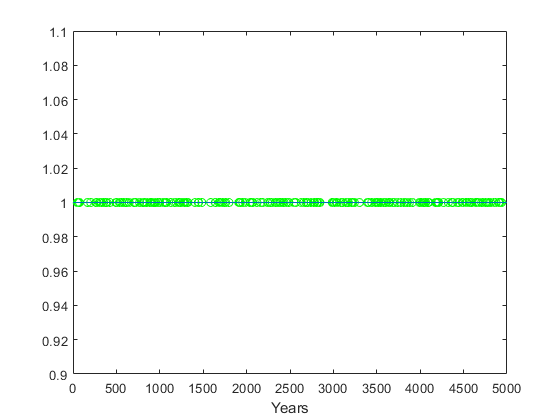

In [32]:
%plot inline
plot(t,yBirth(:,2),'og');
hold on;
line([0 max(t)],[1 1]);
ylim([0.9 1.1]);
xlabel('Years');